# Imports

In [1]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn import tree
import sklearn.cluster as cluster
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
from scipy.optimize import minimize

np.random.seed(1234)

In [ ]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
plt.rcParams.update({"axes.grid": True, "figure.figsize": (8, 4)})
import seaborn as sns

# sns.set()

# Various Data Loads

In [6]:
tips = sns.load_dataset("tips")
X = tips.drop(columns=["tip"])
y = tips["tip"]
display(X)
display(y)

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,Male,No,Sat,Dinner,3
240,27.18,Female,Yes,Sat,Dinner,2
241,22.67,Male,Yes,Sat,Dinner,2
242,17.82,Male,No,Sat,Dinner,2


0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names).join(
    pd.Series(iris["target"], name="species")
)

df["species"] = df["species"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df = pd.read_csv("./data/housing.csv")
df

# 21.0 - Ensemble Techniques

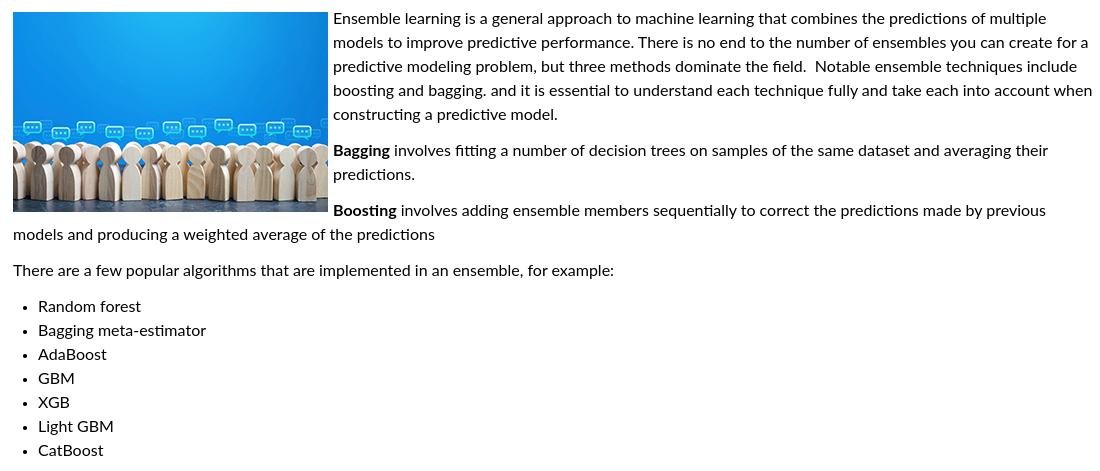

# Overview - Wisdom of the Crowd

The wisdom of the crowd is the idea that the collective knowledge is better than the knowledge of the few. In short, you heavily research and seek the crowd's wisdom before making an informed decision. Diverse views and inputs are universally recognized as beneficial to decision making. As can be seen with the wisdom of the crowd, this same concept can be applied to machine learning with assembling. Rather than using a set of rules to make predictions, random forests depend on the wisdom of the crowd.

# 21.1 Wisdom of the Crowd

Ensemble learning - making decisions based on consensus  
2 most important types
- Bagging
    - Random trees (random forests?)
- Boosting
    - Ada boost
    - Gradient boosted trees

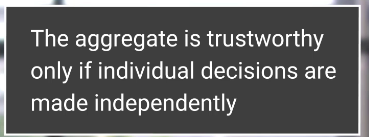

# 21.2 Aggregating Predictors Part 1

The meta-model takes multiple models, makes predictions from each one, and then applies an aggregation function to make the final prediction

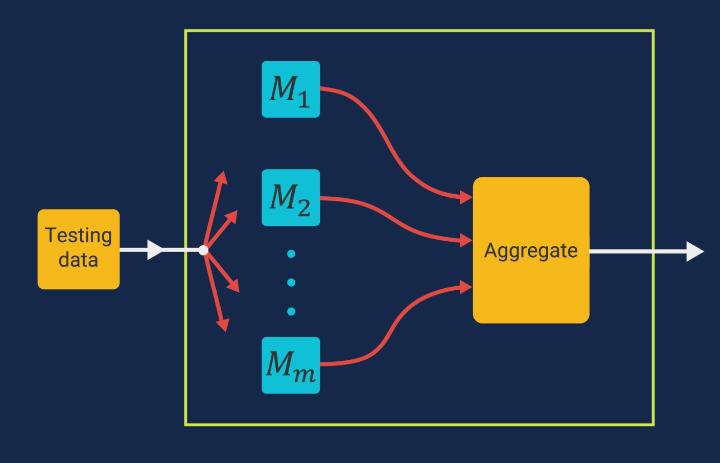

Aggregation function varies depending on whether a classifier or a regressor
- Classifiers can make a majority vote, also known as hard voting
    - For classifiers which admit both a label and a probability of class membership, the probabilities can be averaged, and then choose the class with the highest averaged probability
        - This is called soft voting
- Regression models can simply average the output to get the final prediction
- If desired, can apply weights alpha-i per model to enhance / suppress the significance per model

Boosting
- Predictors are trained sequentially
- Output of model 1 influences model 2
- Output of model 2 influences model 3
- etc...

# 21.3 Aggregating Predictors Part 2

Example implementation of 4 classifiers in a loop of 100 iterations
- Note no need to do a standard scaler for decision tree, since its performance is scale invariant

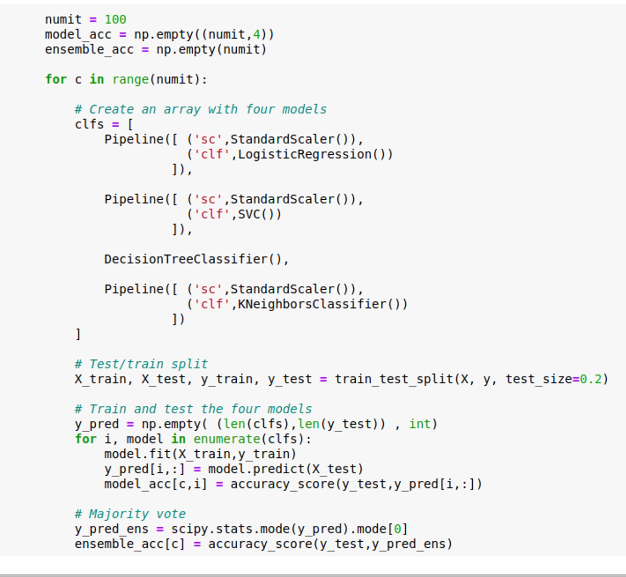

Performance for each classifier, as well as the ensemble, shown below
- Why is ensemble worse?
- The setup violated the pre-condition of independence
- Because they were trained on the same data
- So they were highly correlated
- This can be overcome with *bagging*, which is introducted in next video

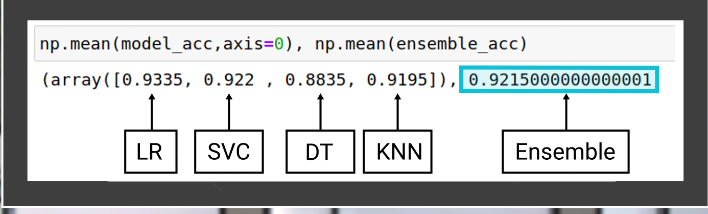

# 21.4 Bootstrapping and Bagging Part 1

Biased models have too much error
- Are too simple

High variance models try too hard to fit the data
- Are too complicated

Both bias and variance of individual models can be reduced using a meta-model
- Research has shown that the best meta-model is made of multiple independent versions of same model
- Not multiple different models, as was previously demonstrated

How you perform ensemble learning depends on whether your models have a bias problem or a variance problem
- High variance -> bagging is the solution
- High bias -> boosting helps

First consider a high variance situation
- The model is too tightly aligned to a data set
- Just get more data!
    - Can't assume that is possible, because data can be expensive
- So you are limited with a small data set
- So the solution then is to pull yourself up by your boot-straps i.e. boot-strapping
- The approach here is to continue to resample the data you already have
    - Key: the sampling must be with replacement
    - Meaning once you select a data point, it remains in the pool for future sampling
- When sampling with replacement
    - The training data set behaves more like an infinite-depth population
    - Increases the variation in the samples
    - You can get duplicates of values in the data set
    - And you may not get all of the values from a set

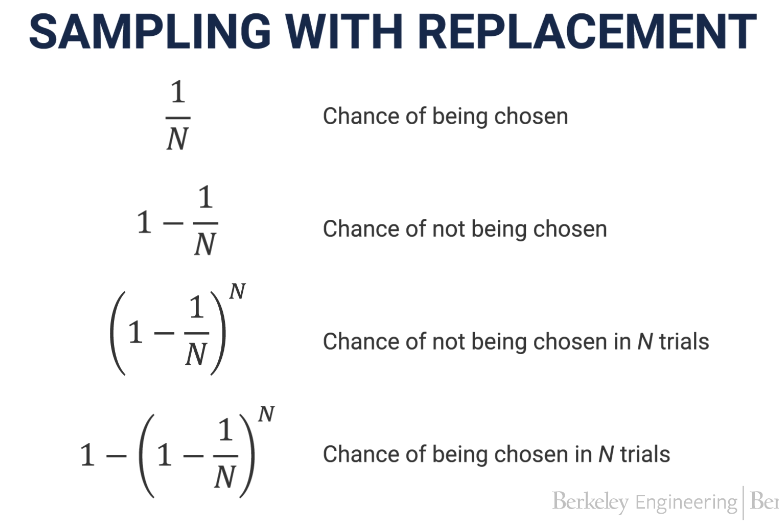

From the plot below, which shows a graph of "chance of being chosen in N trials" for increasing N
- Conclude that for any training sample of sufficient size, about 63% of the data will be chosen
- And the remainder is repetitions of this chosen 63%

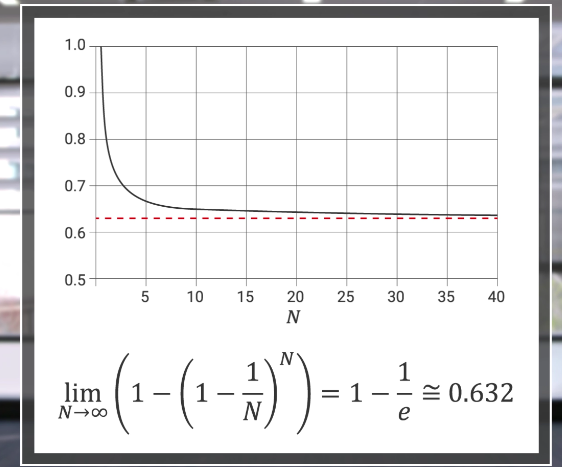

# 21.5 Bootstrapping and Bagging Part 2

Bagging = bootstrapping + aggregation
- Bootstrapped samples decorrelate the samples and increase the power of the ensemble

Continuing with the high-variance situation, consider decision trees as the base model
- Want them to be fairly deep, because deep trees have low bias but high variance

Here is some sample code that makes 1000 decision trees and forms the final prediction as the mode over each of the 1000 predictions

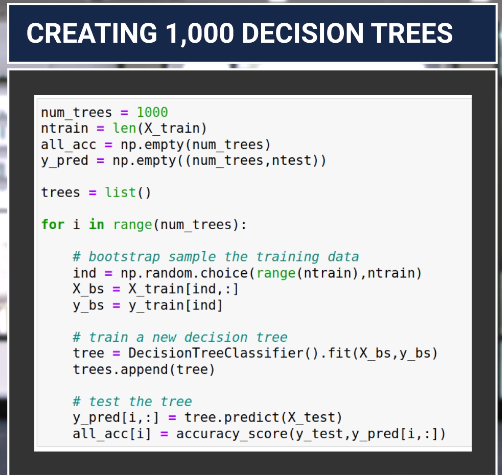

The average accuracy over the 1000 individual trees was 90%, but the ensemble accuracy was 95%

In the above approach, the training and test data sets were partitioned already
- But another approach is out-of-bag evaluation
- Instead of doing the train/test partition, allow every Di sample to sample from the entire data set
    - Data points not chosen in Di are out of bag for Di
    - To evaluate a specific data point, only consider the Di for which it was not included in the training set
        - That is, those Di for which it was out of bag
    - In this approach, you can expose entire data set, not just the training partition, to the training

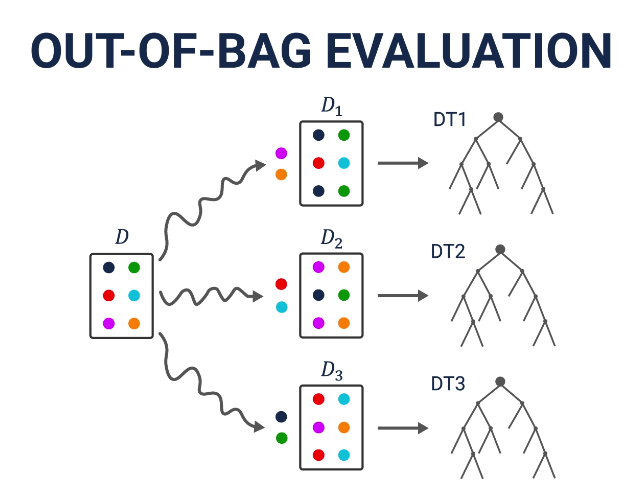

Implementing bagging with sklearn

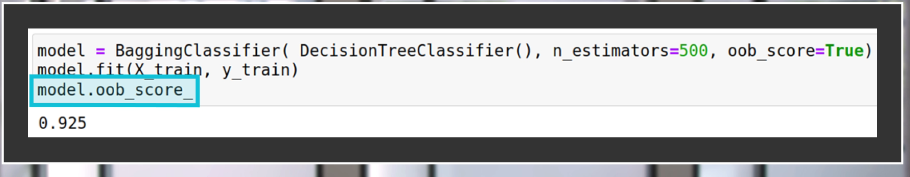

How many estimators should you use?
- It depends, but you can run it and see that the accuracy tends to asymptote
- So select the smallest number that approaches the asymptote, and that you can computationally afford to do

# Mini Lesson on Bagging Classifiers and Regressors

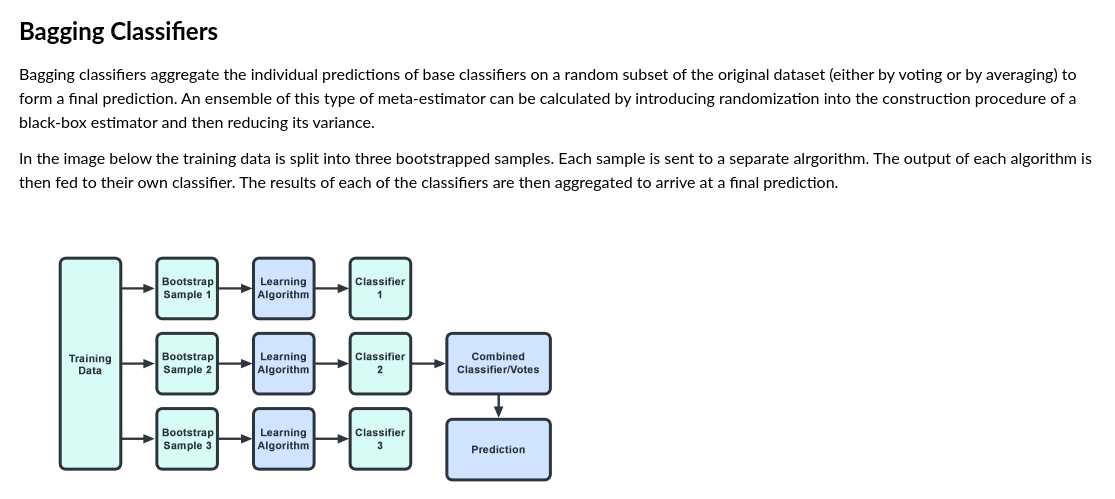

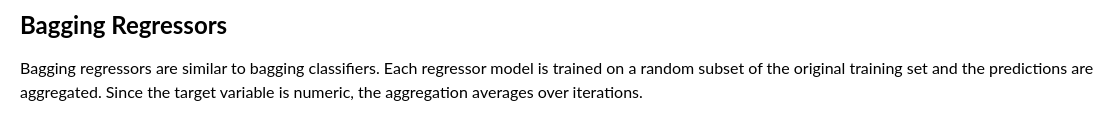